## 1. Визуализировать граф соавторств ИТИСа:
1. выделить гигантскую компоненту связности
2. визуализировать GCC используя любой метод укладки на выбор (методы igraph работают быстрее):
    - `dir(nx.layout)`
    - `[d for d in dir(igraph.Graph) if d.startswith('layout_')]`
3. на изображении подписать 10 вершин (авторов) с наибольшей степенью вершины

## 2. Имплементировать модель Барабаси-Альберты: 

```
def generate_barabsi_albert(n: int) -> np.ndarray:
    """Generates graph with `n` nodes via a preferential attachement process. 
    Returns its binary 0/1 adjacency matrix."""
    ...
```

## 3. Проанализировать граф ИТИСа
- Оцените параметр $\lambda$, насколько граф ИТИСа соответствует Power law distribution?

## Задание 1

In [33]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import networkx as nx
%matplotlib inline

In [34]:
fname = Path('../data/itas_2009-2017_v8.xls')
itas_all = pd.read_excel(fname)
itas_all.head()

title  year  \
0  Improving Energy-awareness in Selective Reprog...  2016   
1  PIFA Antenna Design for Fourth Generation Wire...  2017   
2  Optimization algorithm for an information grap...  2016   
3    Indoor Positioning in WiFi and NanoLOC Networks  2016   
4  Variable-to-Fixed Length Resolution Codes for ...  2016   

                 author        Name    Surname         author_id_new Gender  
0          Hadeel Abdah      Hadeel      Abdah          Abdah Hadeel   Male  
1         Amin Al-Ka'bi        Amin   Al-Ka'bi         Al-Ka'bi Amin   Male  
2     Mohammed Al-Mardi    Mohammed   Al-Mardi     Al-Mardi Mohammed   Male  
3  Abdulwahab Al-odhari  Abdulwahab  Al-odhari  Al-odhari Abdulwahab   Male  
4              R. Amjad          R.      Amjad              Amjad R.   Male

In [67]:
title_author = itas_all.groupby(by=['title', 'author_id_new']).count().reset_index()
titles, authors = title_author.title, title_author.author_id_new
title_author.head(5)

title        author_id_new  \
0                    "Зеркальные риды" в данных Hi-C     Гаврилов Алексей   
1                    "Зеркальные риды" в данных Hi-C  Галицына Александра   
2                    "Зеркальные риды" в данных Hi-C   Храмеева Екатерина   
3  ''Connected Car''-Based Customised On-Demand T...         Гусыхин Олег   
4  ''Connected Car''-Based Customised On-Demand T...    Смирнов Александр   

   year  author  Name  Surname  Gender  
0     1       1     1        1       1  
1     1       1     1        1       1  
2     1       1     1        1       1  
3     1       1     1        1       1  
4     1       1     1        1       1

In [68]:
inc_table = pd.crosstab(authors, titles)
inc_table.head(5)

title                 "Зеркальные риды" в данных Hi-C  \
author_id_new                                           
Abdah Hadeel                                        0   
Al-Ka'bi Amin                                       0   
Al-Mardi Mohammed                                   0   
Al-odhari Abdulwahab                                0   
Amjad R.                                            0   

title                 ''Connected Car''-Based Customised On-Demand Tours: the Concept and Underlying Technologies  \
author_id_new                                                                                                       
Abdah Hadeel                                                          0                                             
Al-Ka'bi Amin                                                         0                                             
Al-Mardi Mohammed                                                     0                                             
Al-odhari Abdulwahab                                                  0                                             
Amjad R.                                                              0                                             

title                 A Brief Study of Dimensionality Reduction for Mass Spectra Classification  \
author_id_new                                                                                     
Abdah Hadeel                                                          0                           
Al-Ka'bi Amin                                                         0                           
Al-Mardi Mohammed                                                     0                           
Al-odhari Abdulwahab                                                  0                           
Amjad R.                                                              0                           

title                 A Generic Web Service for Running Parameter Sweep Applications  \
author_id_new                                                                          
Abdah Hadeel                                                          0                
Al-Ka'bi Amin                                                         0                
Al-Mardi Mohammed                                                     0                
Al-odhari Abdulwahab                                                  0                
Amjad R.                                                              0                

title                 A List Decoding Approach to Woven Block Codes  \
author_id_new                                                         
Abdah Hadeel                                                      0   
Al-Ka'bi Amin                                                     0   
Al-Mardi Mohammed                                                 0   
Al-odhari Abdulwahab                                              0   
Amjad R.                                                          0   

title                 A Low-Complexity SCMA Detector for AWGN Channel Based on Solving Overdetermined Systems of Linear Equations.  \
author_id_new                                                                                                                        
Abdah Hadeel                                                          0                                                              
Al-Ka'bi Amin                                                         0                                                              
Al-Mardi Mohammed                                                     0                                                              
Al-odhari Abdulwahab                                                  0                                                              
Amjad R.                                                              0                                                              

title                 A New Cent

In [37]:
adjacency_matrix = inc_table.values.dot(inc_table.values.T)
n_papers = np.diag(adjacency_matrix)
np.fill_diagonal(adjacency_matrix, 0)
adjacency_matrix[adjacency_matrix>1] = 1

In [38]:
itis_G = nx.from_numpy_array(adjacency_matrix)

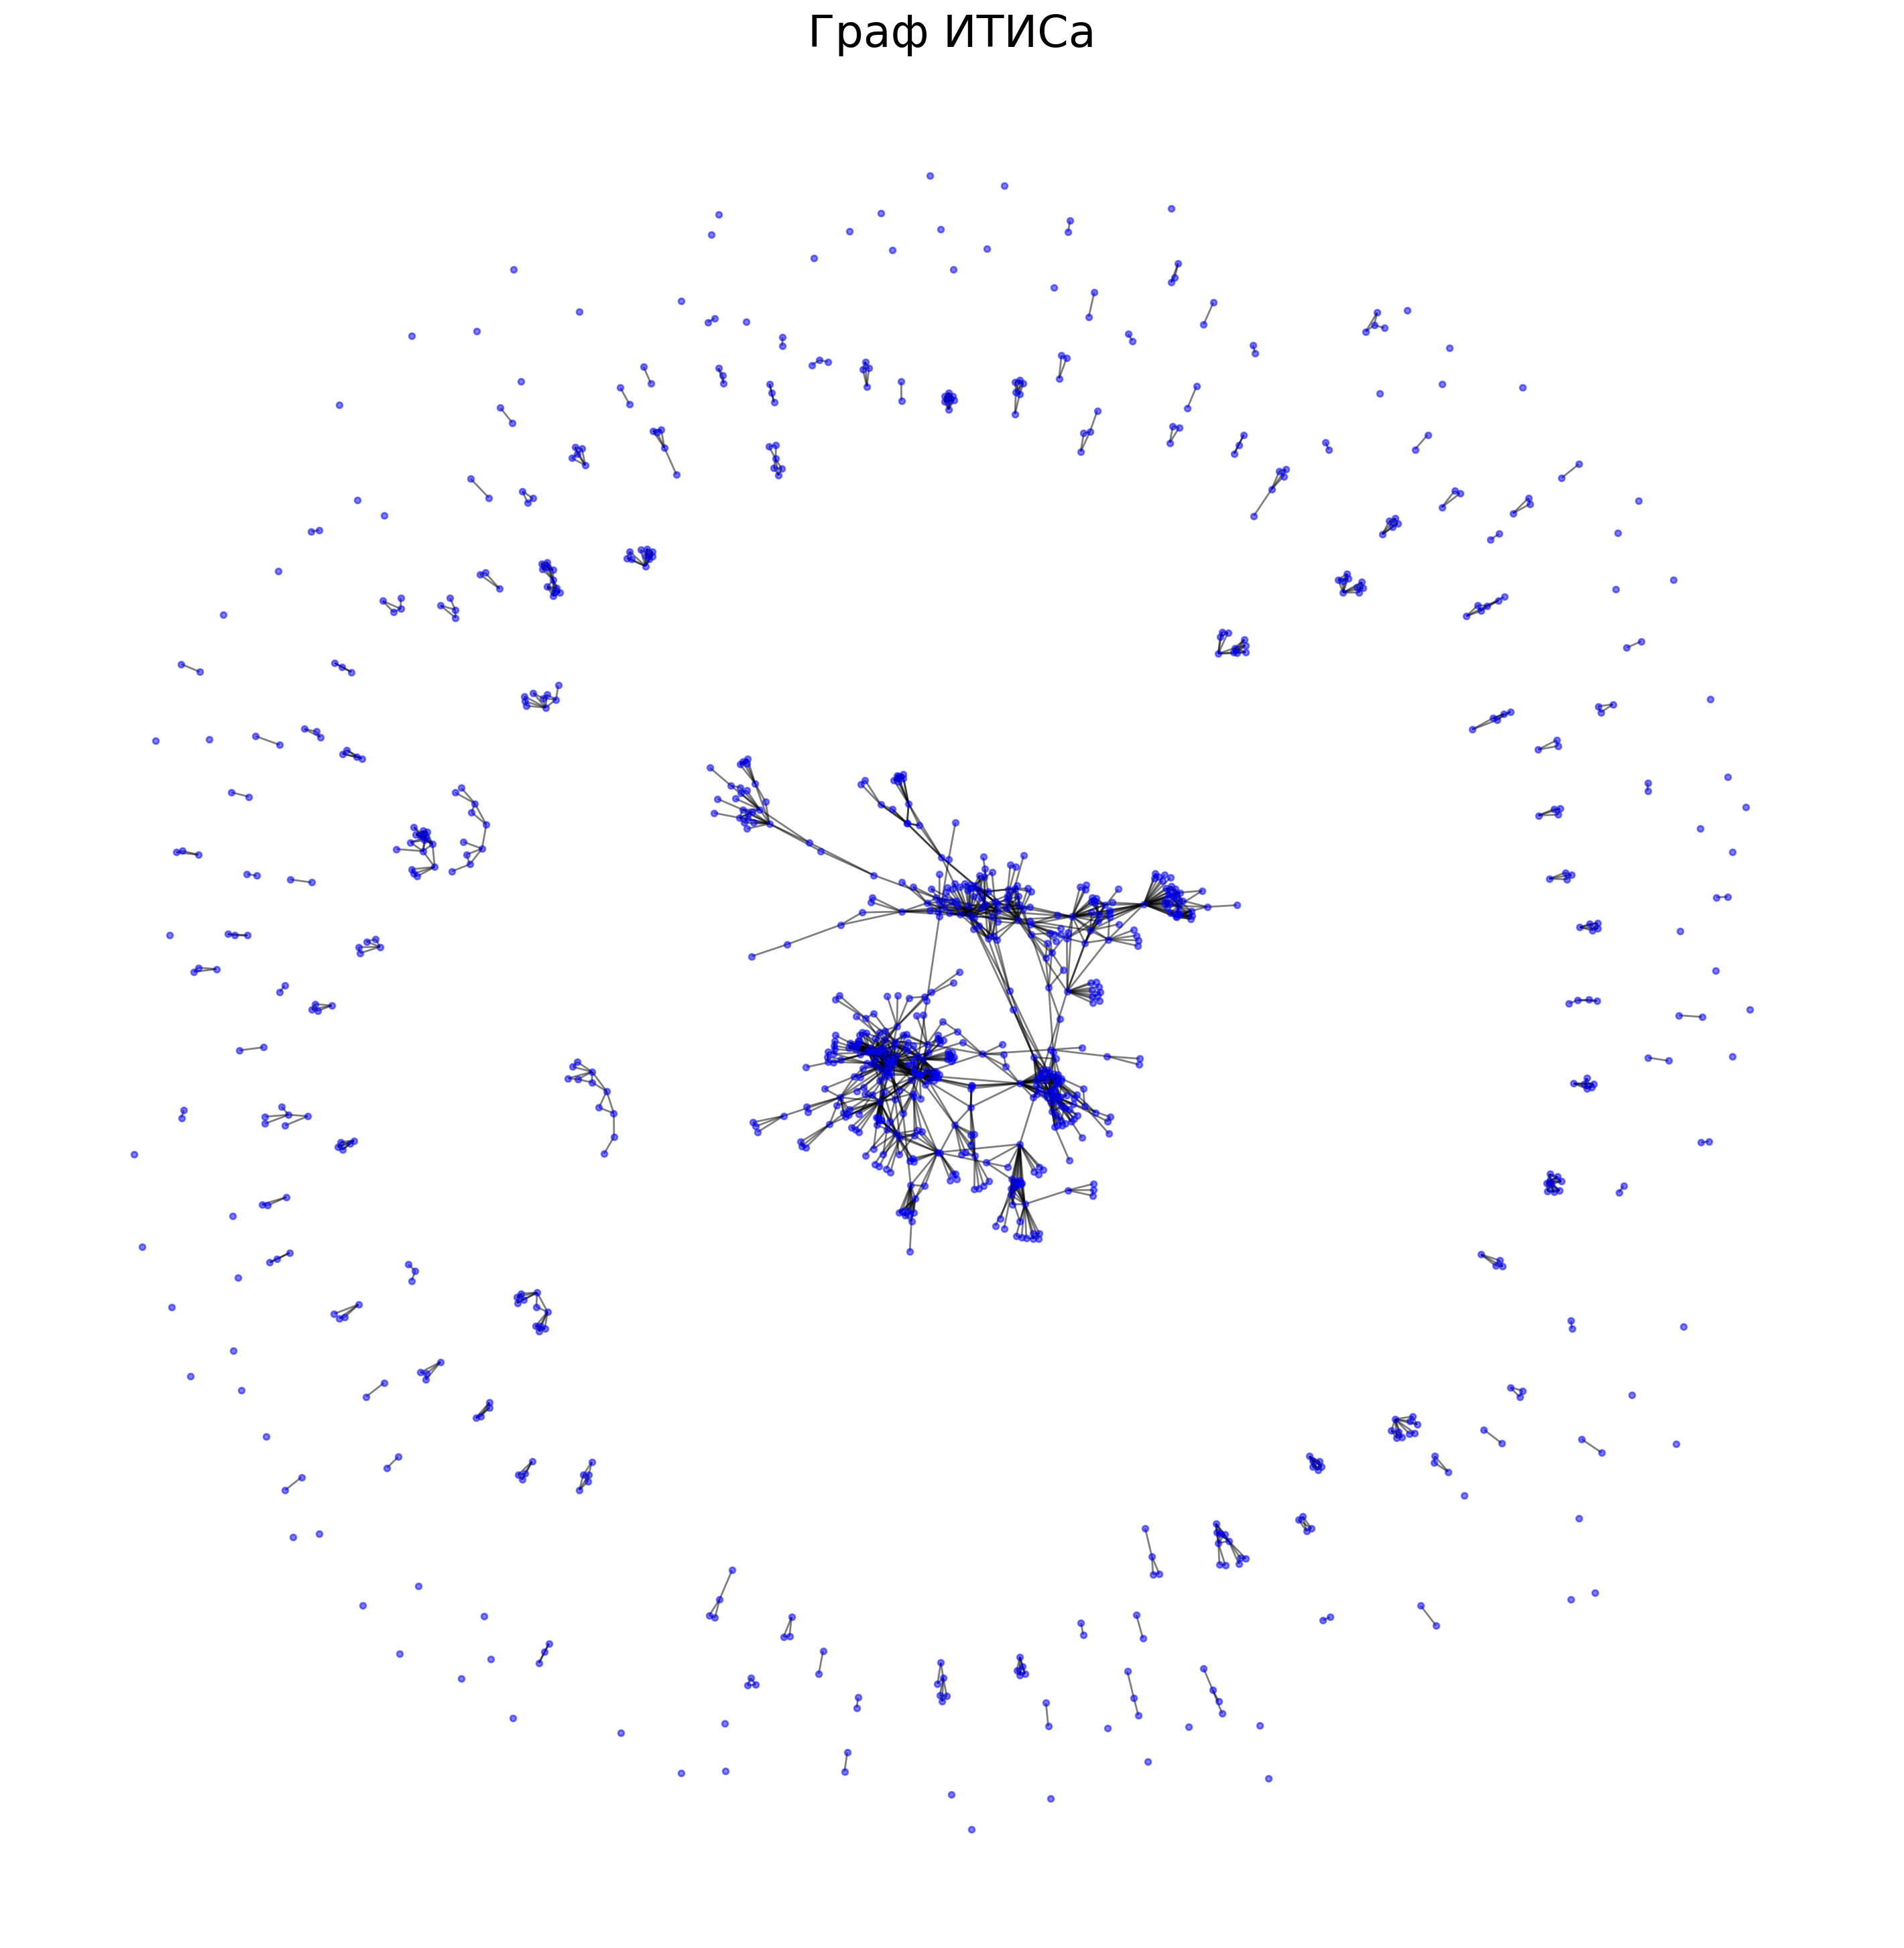

In [50]:
figure(figsize=(14, 14), dpi=200)
nx.draw(itis_G, node_size=10, alpha=0.5, node_color='blue')
plt.title('Граф ИТИСа', fontsize=24);

### 1.1. выделение гигантской компоненты связности

In [40]:
connected_components = sorted(nx.connected_components(itis_G), key=len, reverse=True)
gcc = itis_G.subgraph(connected_components[0])

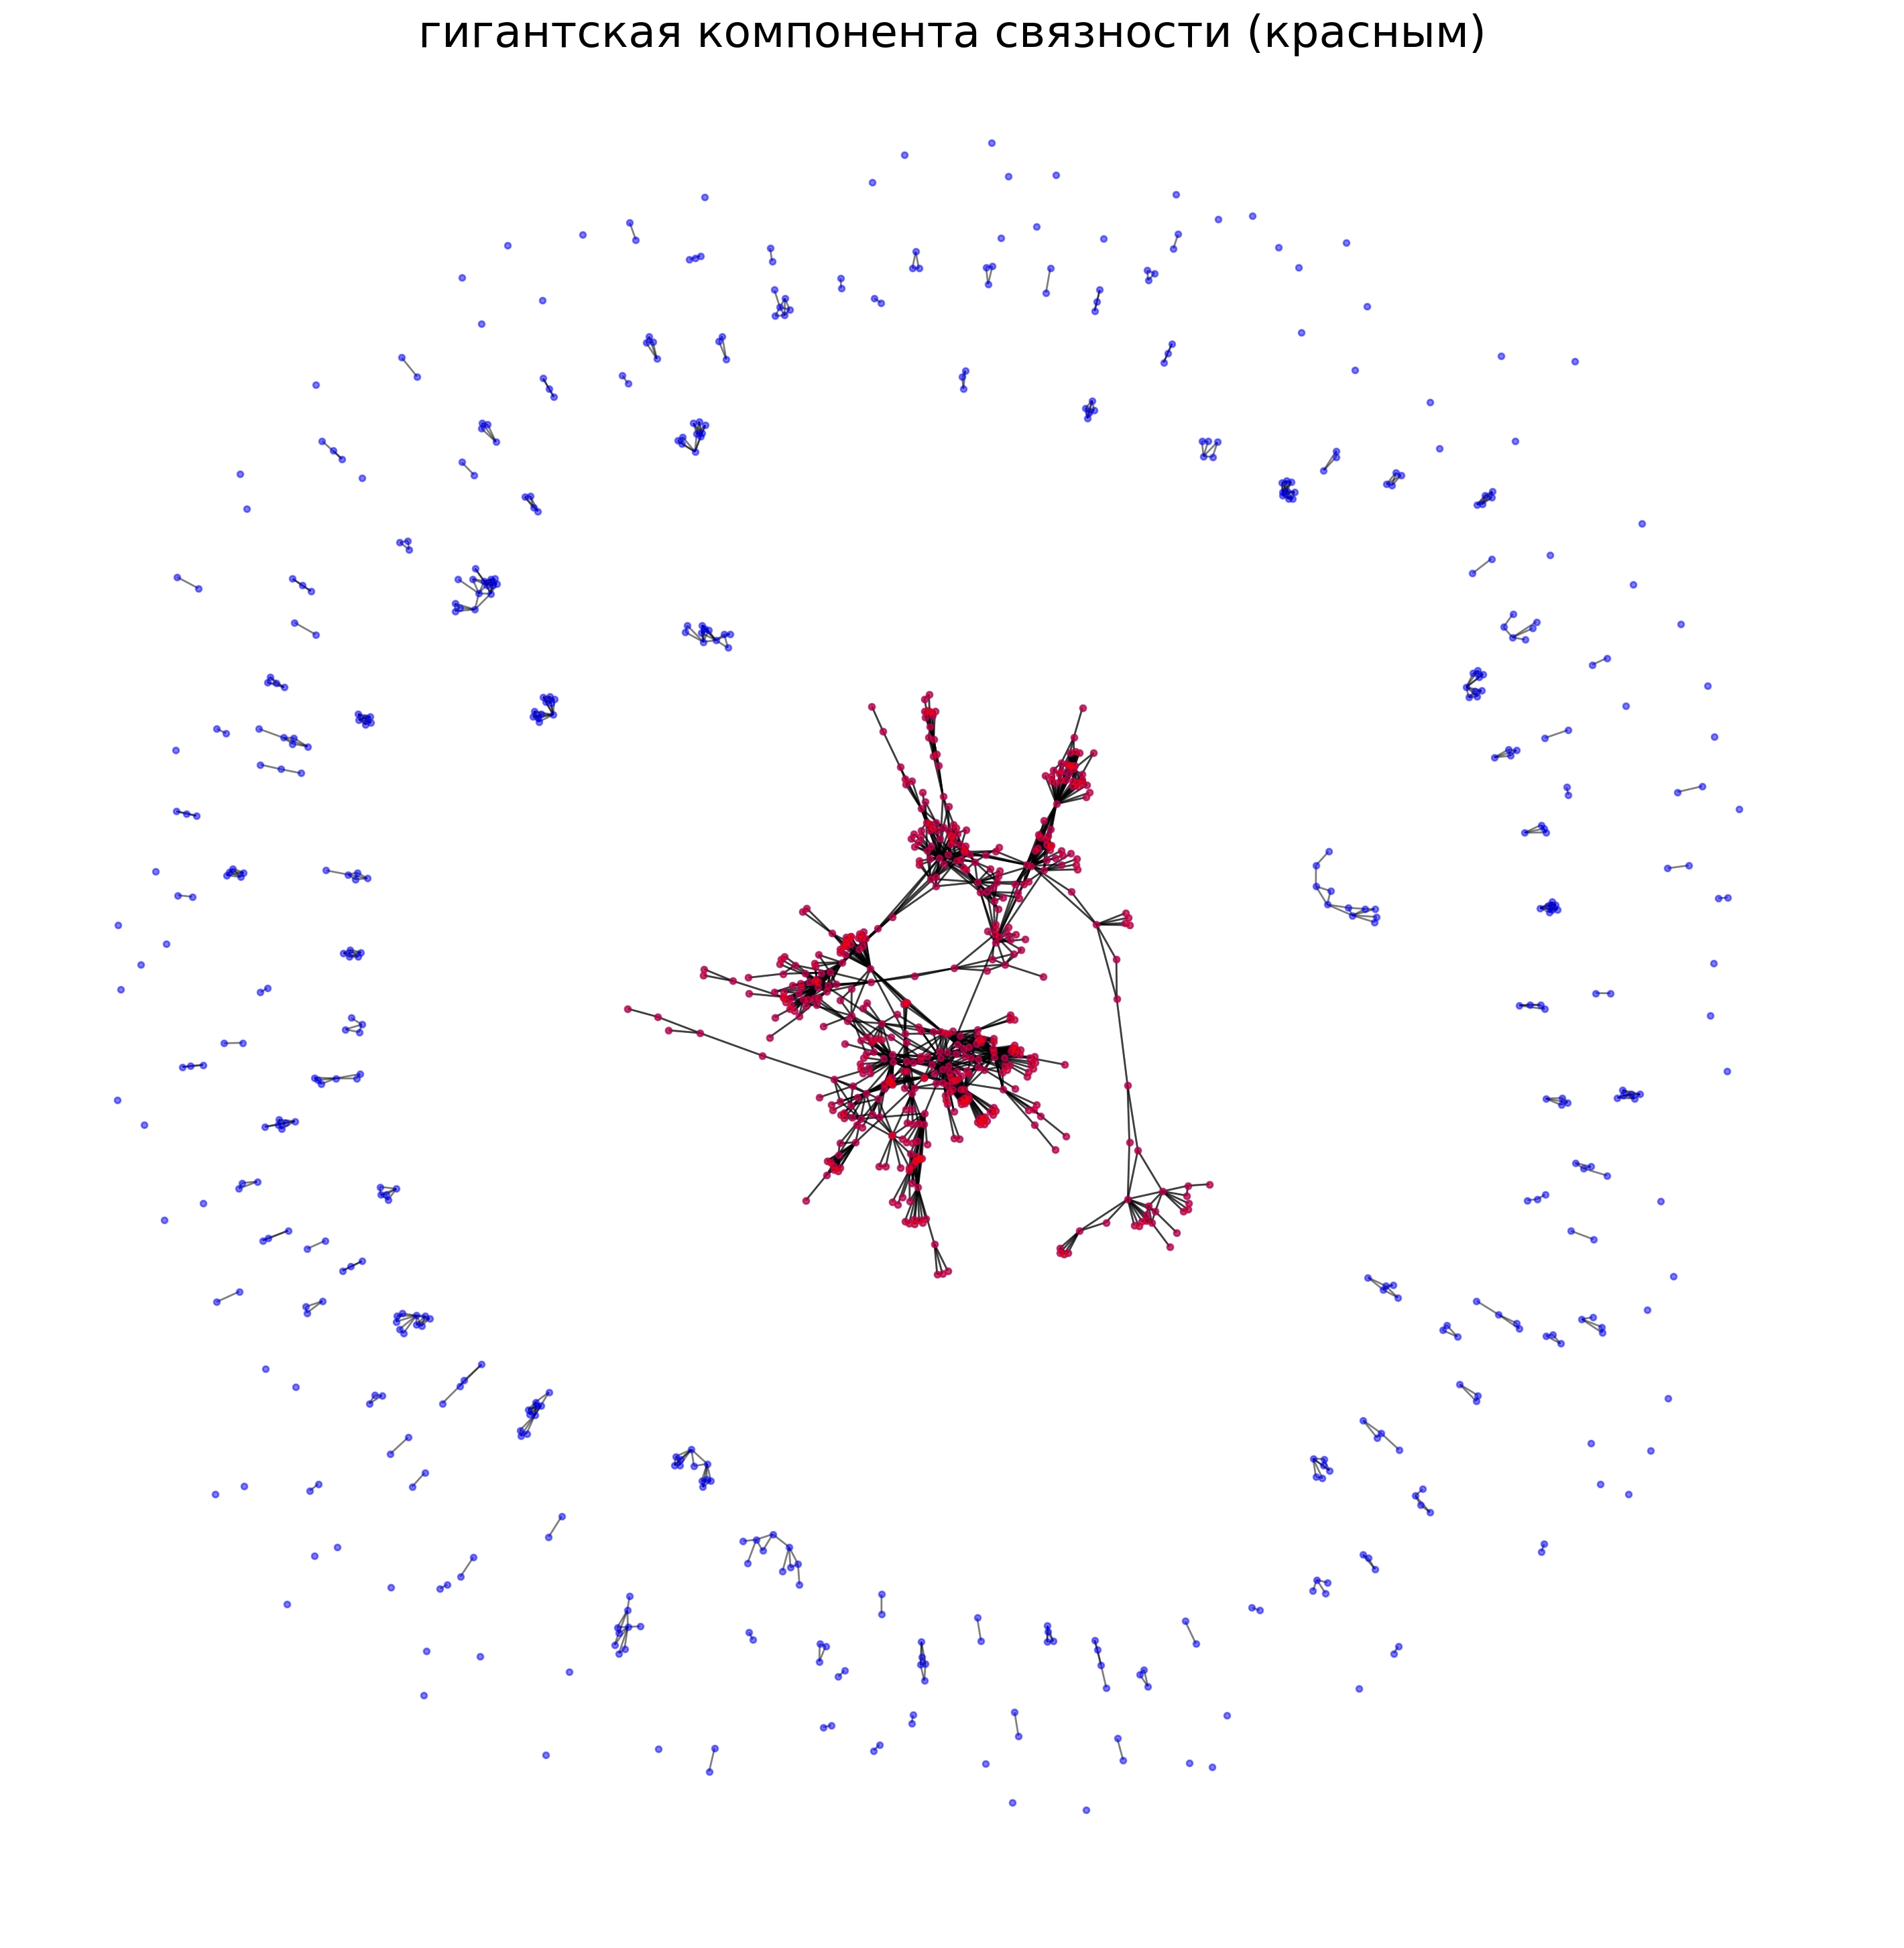

In [51]:
figure(figsize=(14, 14), dpi=200)
pos = nx.spring_layout(itis_G)
nx.draw(itis_G, pos=pos, node_size=10, alpha=0.5, node_color='blue')
nx.draw(gcc, pos=pos, node_size=10, alpha=0.5, node_color='red')
plt.title('гигантская компонента связности (красным)', fontsize=24);

### 1.2. визуализация GCC используя метод укладки Kamada-Kawai

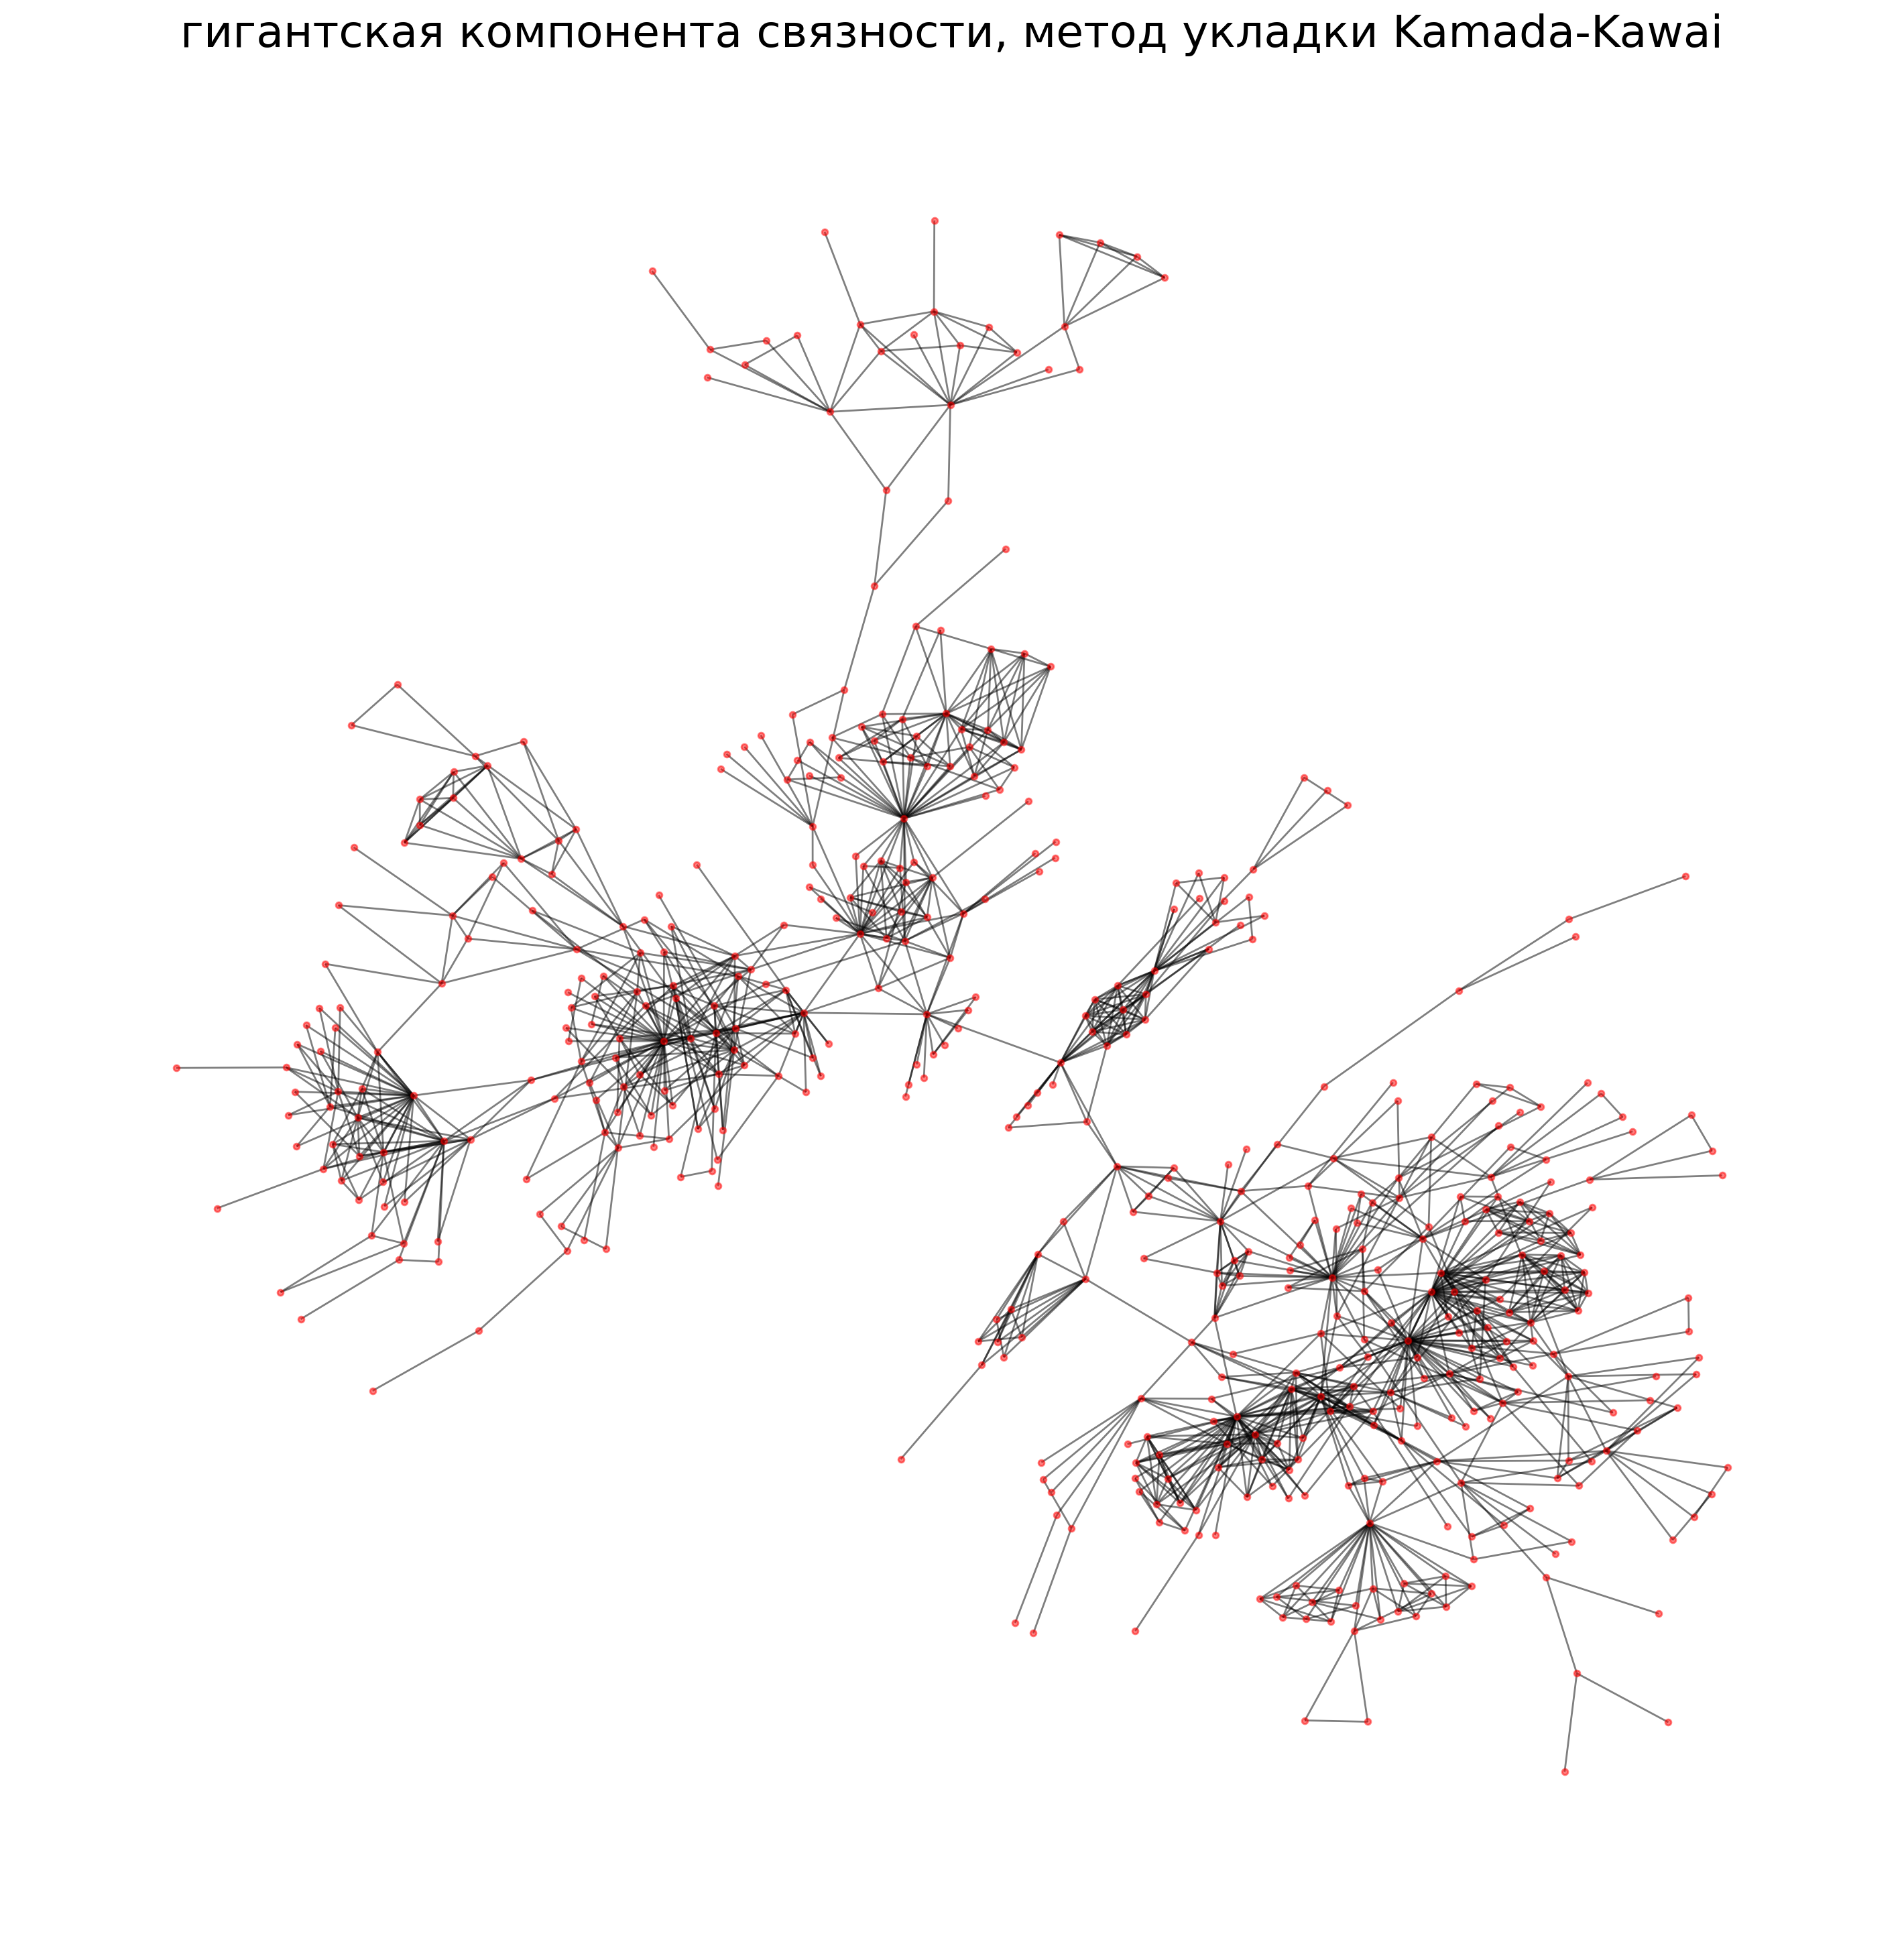

In [52]:
figure(figsize=(14, 14), dpi=200)
nx.draw(gcc, pos=nx.kamada_kawai_layout(gcc), node_size=10, alpha=0.5, node_color='red')
plt.title('гигантская компонента связности, метод укладки Kamada-Kawai', fontsize=24);

###  1.3. 10 вершин (авторов) с наибольшей степенью вершины
я подписываю на фоне гигансткой компоненты связности для более воспринимаемой визуалицзации

In [43]:
node_degree_dict=nx.degree(itis_G)
degree_sequence = sorted((d for _, d in itis_G.degree()), reverse=True)
top10_degrees = degree_sequence[:10]
top10_nodes = [x for x in itis_G.nodes() if node_degree_dict[x] in top10_degrees]
top10_subgraph=nx.subgraph(itis_G, top10_nodes)
top10_degrees

[46, 44, 41, 38, 36, 32, 28, 27, 27, 26]

In [44]:
labels_for_top10_nodes = authors[top10_nodes].to_dict()
labels_for_top10_nodes

{167: 'Zikratov Igor',
 188: 'Востоков С.',
 226: 'Shelyakin Pavel',
 294: 'Abdah Hadeel',
 501: 'Катруца Александр',
 645: 'Kokkonen Tero',
 688: 'Мастов А.',
 832: 'Куреев Алексей',
 953: 'Малько Д.Б.',
 986: 'Подлесская О.Ю.'}

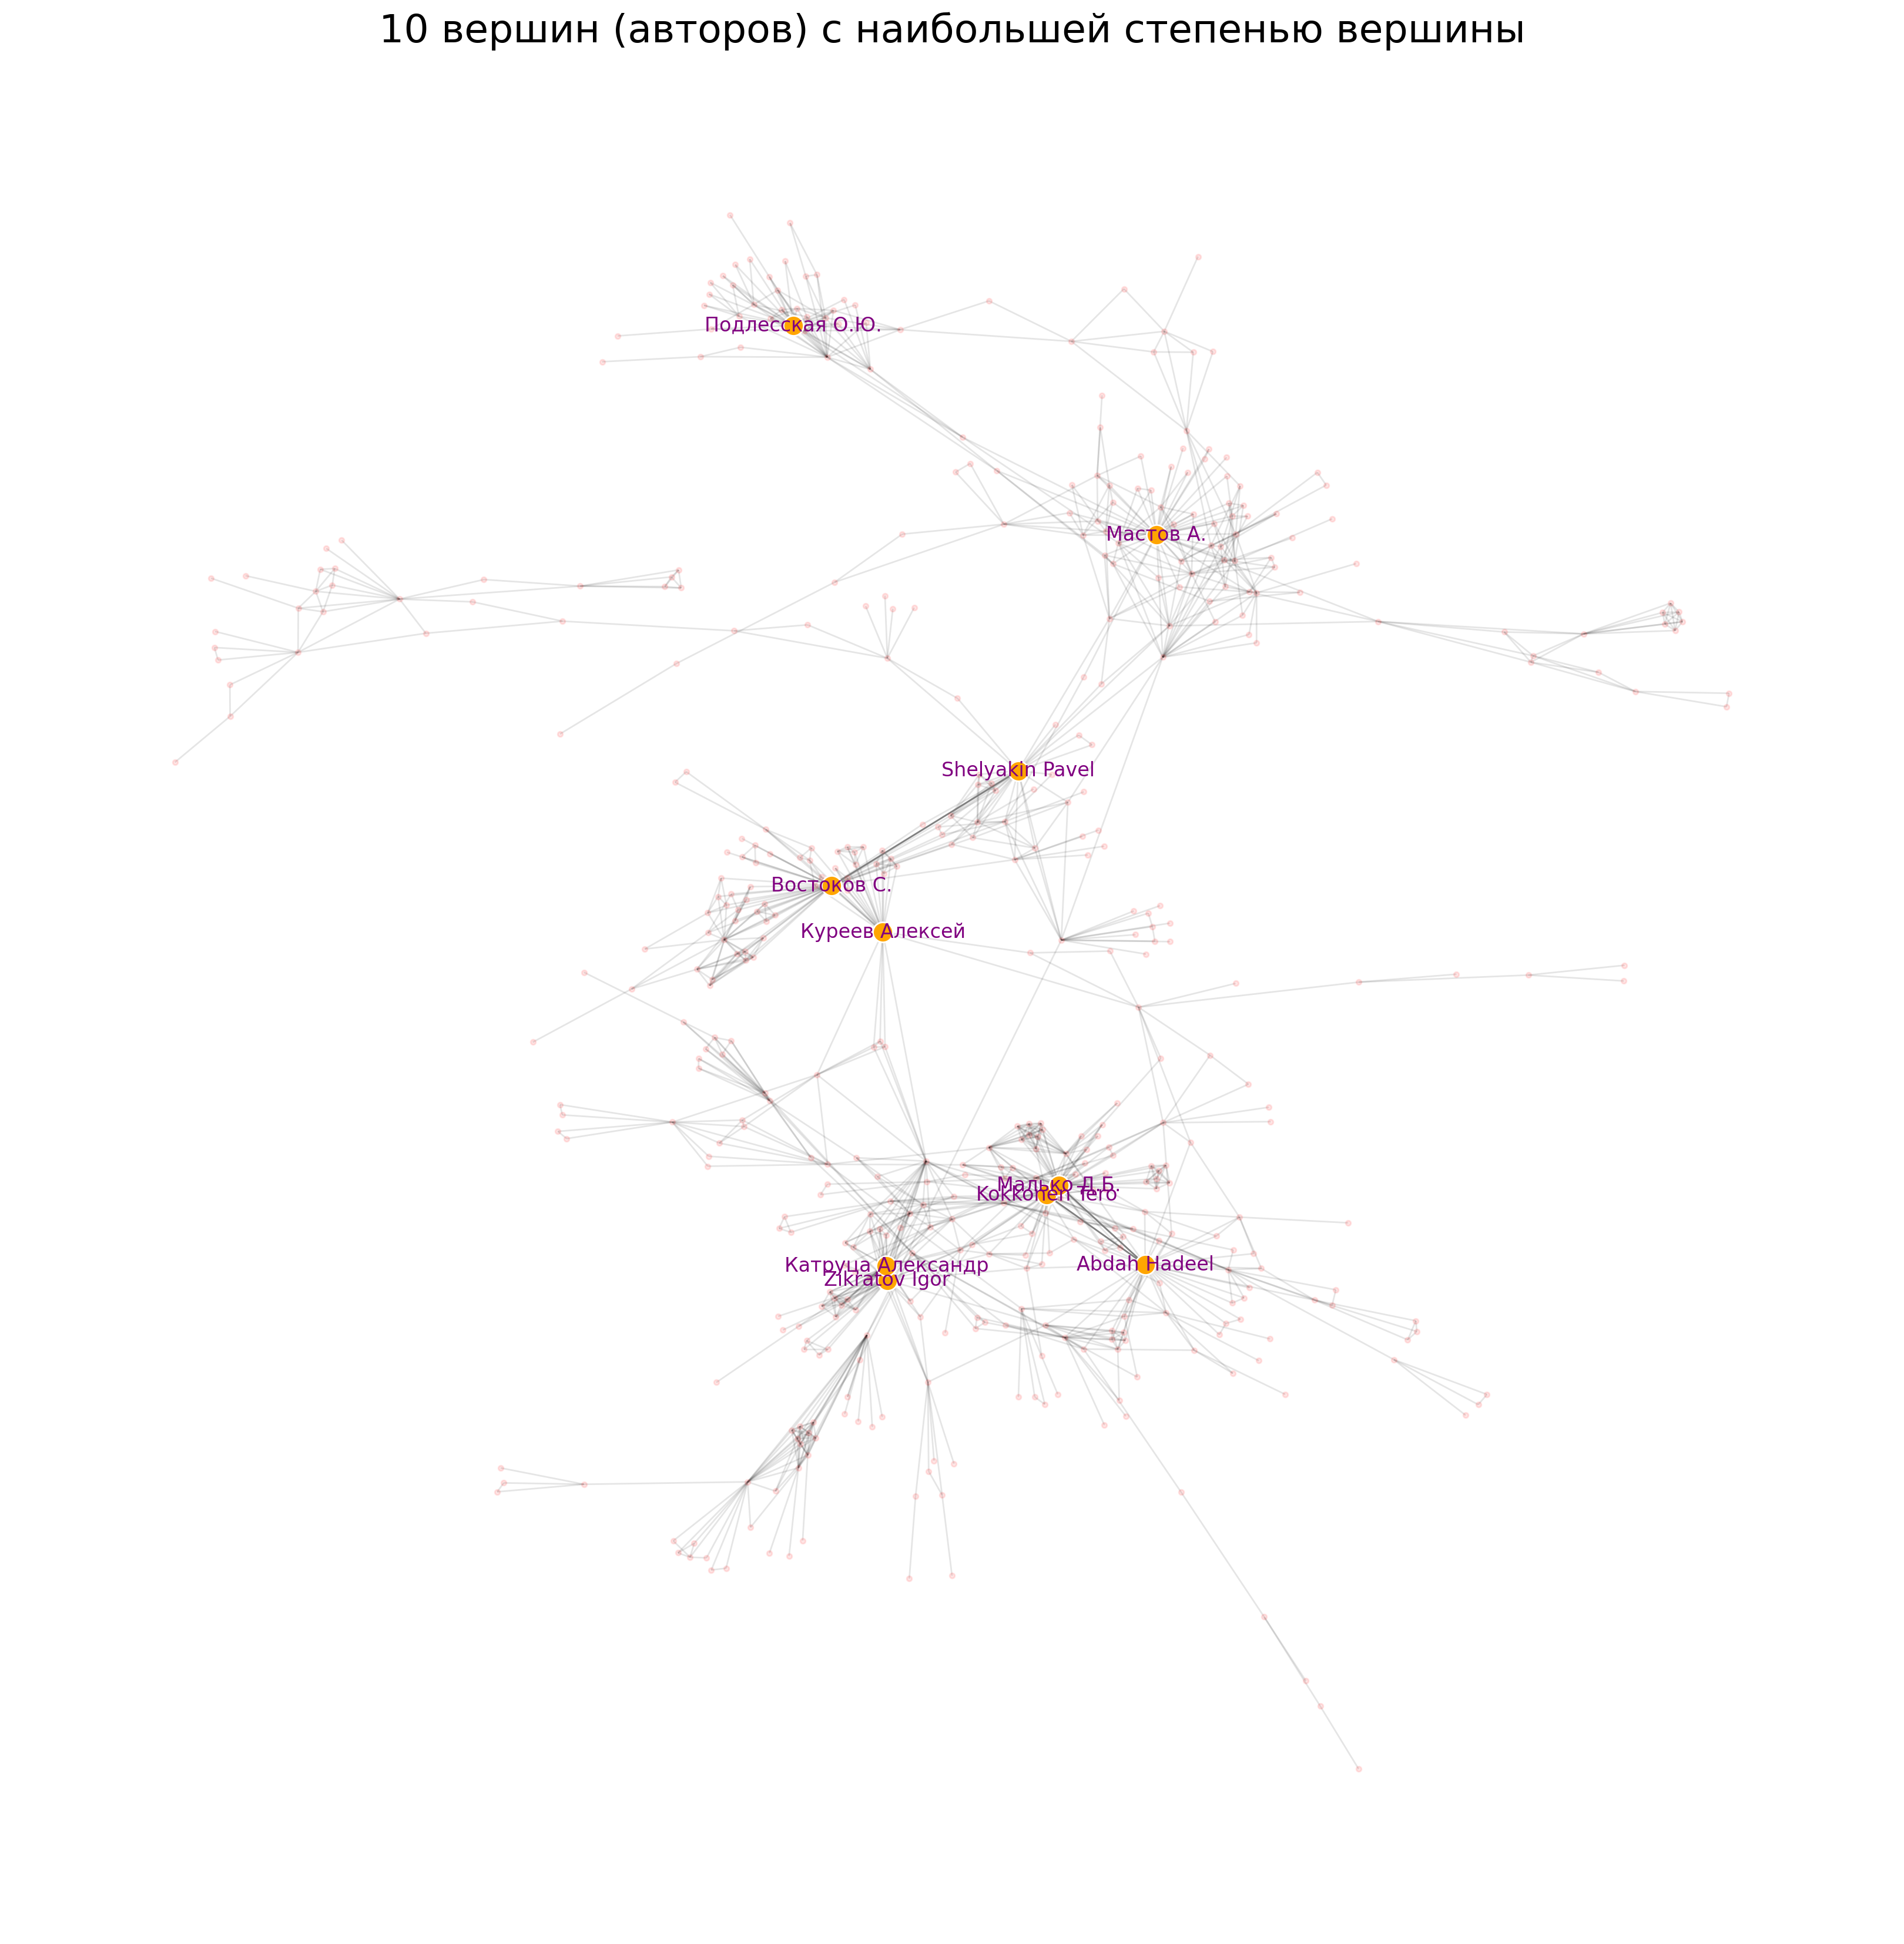

In [53]:
figure(figsize=(16, 16), dpi=200)
pos = nx.spring_layout(gcc)
nx.draw(gcc, pos=pos, node_size=10, alpha=0.1, node_color='red')
nx.draw(top10_subgraph, pos, node_size=150, alpha=1, 
                       node_color='orange', edgecolors='white', edge_color='grey', font_color='purple',
                       labels=labels_for_top10_nodes);
plt.title('10 вершин (авторов) с наибольшей степенью вершины', fontsize=24);

### Задание 2.

In [82]:
def generate_barabsi_albert(m_0, n, m) -> np.ndarray:
    """Generates graph with `n` nodes via a preferential attachement process. 
    Returns its binary 0/1 adjacency matrix."""
    
    def rand_prob_node(G):
        nodes_probs = []
        for node in G.nodes():
            node_degr = G.degree(node)
            node_proba = node_degr / (2 * len(G.edges()))
            nodes_probs.append(node_proba)
        random_proba_node = np.random.choice(G.nodes(),p=nodes_probs)
        
        return random_proba_node

    def add_edge(G, new_node):
        if len(G.edges()) == 0:
            random_proba_node = 0
        else:
            random_proba_node = rand_prob_node(G)
        new_edge = (random_proba_node, new_node)
        if new_edge in G.edges():
            add_edge(G, new_node)
        else:
            G.add_edge(new_node, random_proba_node)
                
    if m > m_0:
        print('error: m > m_0')
        return False
    else:
        G = nx.complete_graph(m_0)
        count = 0
        new_node = m_0
        for f in range(n - m_0):
            G.add_node(m_0 + count)
            count += 1
            for e in range(0, m):
                add_edge(G, new_node)
            new_node += 1
            
    return np.array(nx.adjacency_matrix(G).todense())

In [121]:
from sklearn.linear_model import LinearRegression

In [181]:
def log_scale_coef(adjacency_matrix):
    bins = np.histogram(adjacency_matrix.sum(axis=1), bins=20)
    
    # чтобы в логарифм не попадали нули
    nonzero_mask = bins[0]>0
    
    model = LinearRegression()
    model.fit(np.log(bins[1][1:][nonzero_mask]).reshape(-1,1), np.log(bins[0][nonzero_mask]))
    x = np.linspace(1.2, 4.6, 100).reshape(-1,1)
    y = model.predict(x)

    plt.scatter(np.log(bins[1][1:][nonzero_mask]), np.log(bins[0][nonzero_mask]))
    plt.plot(np.log(bins[1][1:][nonzero_mask]), np.log(bins[0][nonzero_mask]))

    plt.plot(x, y, c='r', label=f'alpha = {np.round(model.coef_[0], 3)}')
    plt.legend();
    
    return model, np.log(bins[1][1:][nonzero_mask]).reshape(-1,1), np.log(bins[0][nonzero_mask])

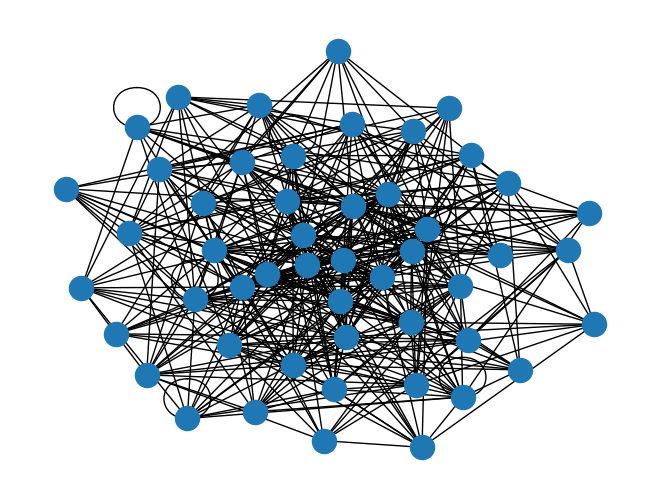

In [164]:
ba_adj_mtx = generate_barabsi_albert(10, 50, 10)
nx.draw(nx.from_numpy_array(ba_adj_mtx))

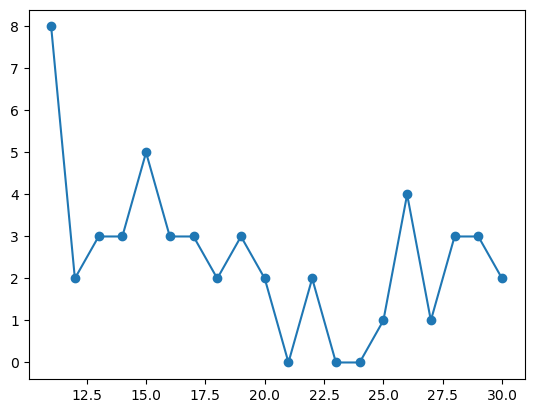

In [165]:
bins = np.histogram(ba_adj_mtx.sum(axis=1), bins=20)
plt.scatter(bins[1][1:], bins[0])
plt.plot(bins[1][1:], bins[0]);

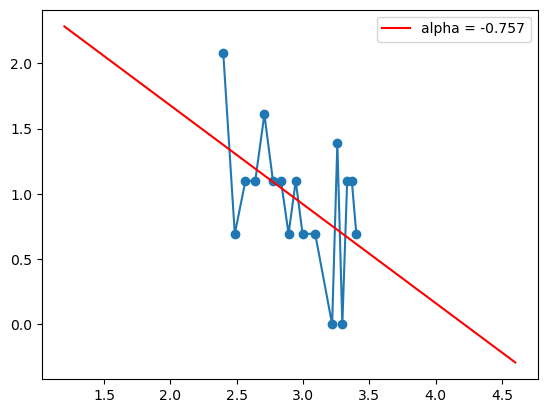

In [166]:
log_scale_coef(ba_adj_mtx);

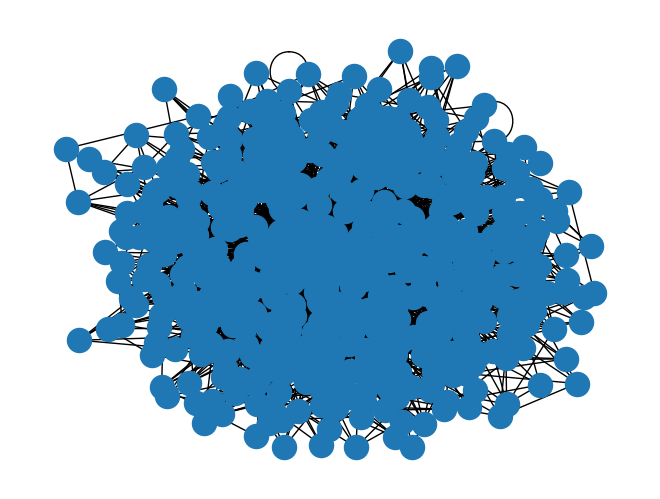

In [167]:
ba_adj_mtx = generate_barabsi_albert(10, 500, 5)
nx.draw(nx.from_numpy_array(ba_adj_mtx))

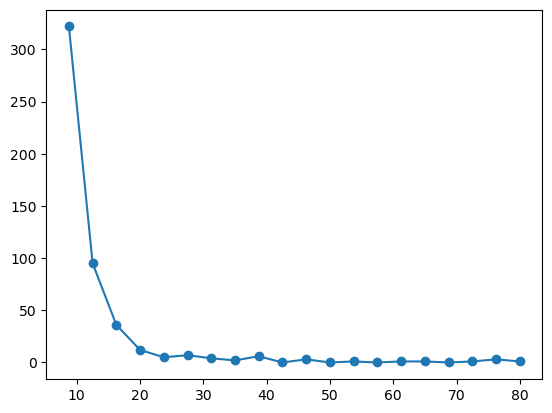

In [168]:
bins = np.histogram(ba_adj_mtx.sum(axis=1), bins=20)
plt.scatter(bins[1][1:], bins[0])
plt.plot(bins[1][1:], bins[0]);

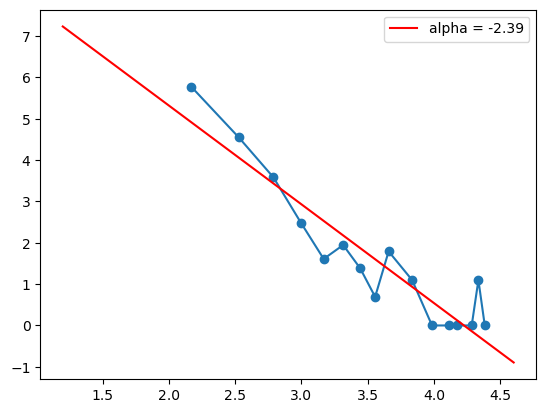

In [169]:
log_scale_coef(ba_adj_mtx);

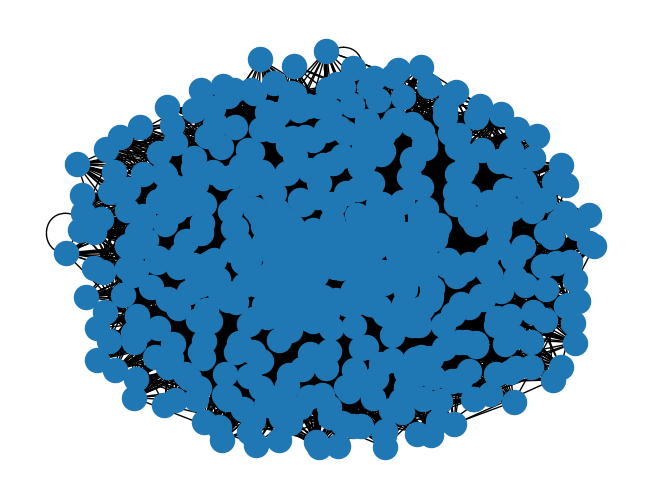

In [170]:
ba_adj_mtx = generate_barabsi_albert(30, 500, 20)
nx.draw(nx.from_numpy_array(ba_adj_mtx))

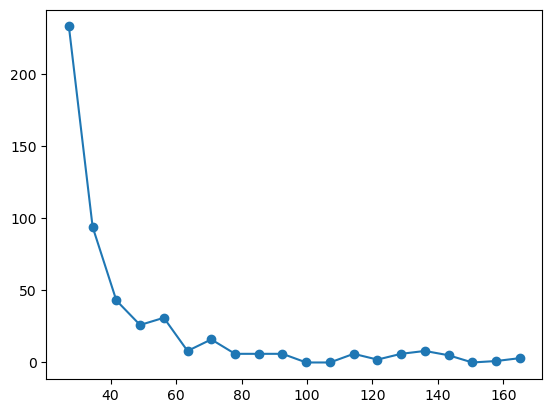

In [171]:
bins = np.histogram(ba_adj_mtx.sum(axis=1), bins=20)
plt.scatter(bins[1][1:], bins[0])
plt.plot(bins[1][1:], bins[0]);

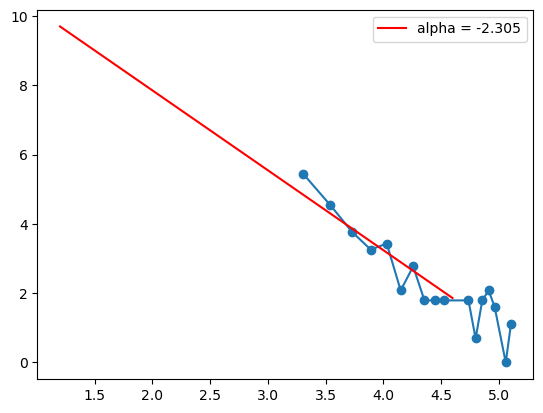

In [172]:
log_scale_coef(ba_adj_mtx);

### Задание 3.

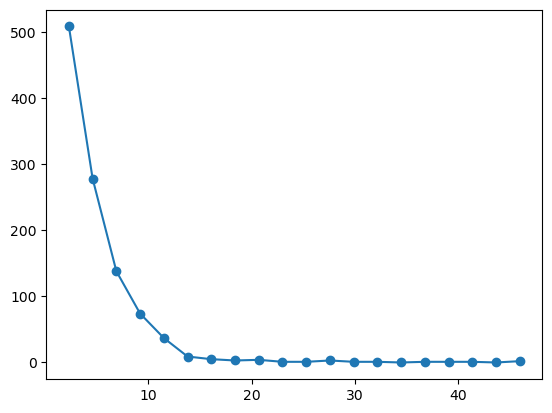

In [157]:
bins = np.histogram(adjacency_matrix.sum(axis=1), bins=20)
plt.scatter(bins[1][1:], bins[0])
plt.plot(bins[1][1:], bins[0]);

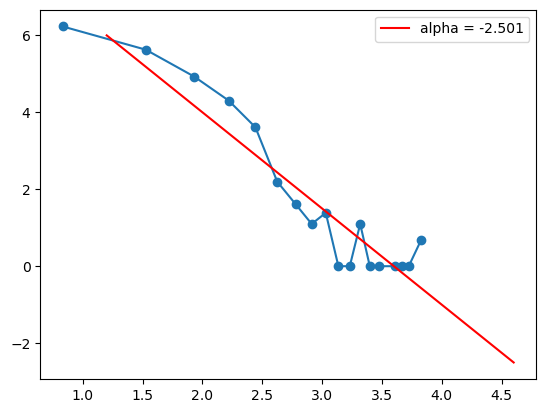

In [182]:
model, x, y = log_scale_coef(adjacency_matrix)

In [176]:
from sklearn.metrics import r2_score

In [184]:
y_pred = model.predict(x)

In [185]:
r2_score(y, y_pred)

0.9041787958813658

Коэффициент равен -2.501. Судя по $r^2 = 0.904$ можно сделать вывод, что граф ИТИСа в некотором приближении соответствует Power law distribution. однако, хоть и $r^2$ близок к 1, по графику видно, что зависимость нелинейная и нельзя утверждать что анализируемый граф соответствует Power law distribution.